In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from random import choices

#TODO
- [x] delays
    - [x] with noise
- [x] values
    - [x] with noise
- [x] names
- [x] create dataframe
- [x] extract by name
- [x] plot 2d Histogram
- [x] normalize on delay bin

### create fake data

In [2]:
def add_noise(mean=0., width=0.5):
    return np.random.normal(mean, width)

def get_delay(population= [1., 2., 3., 4., 5., 6., 7.],
              weights= [1., 0.2, 1., 0.2, 1., 0.2, 1.]):
    return choices(population, weights)[0] + add_noise()

def get_value(population= [1., 2., 3., 4., 5.],
              weights= [1., 3., 5., 3., 1.]):
    return choices(population, weights)[0] + add_noise()

def get_name(population= ["good ion", "bad ion", "evil ion"],
              weights= [1., 2., 0.1]):
    return choices(population, weights)[0]




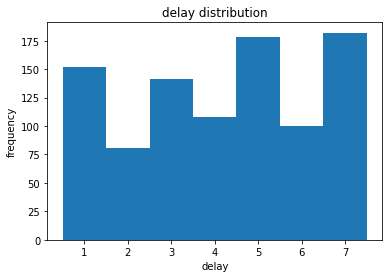

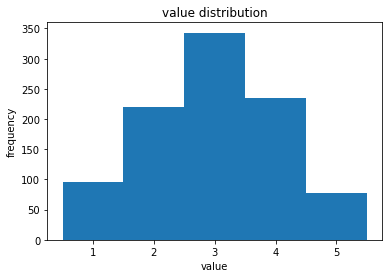

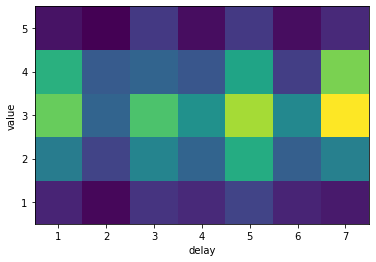

In [3]:
samples = 1000

delays = [get_delay() for i in range(samples)]
delay_bins = np.array([0,1,2,3,4,5,6,7]) + 0.5

values = [get_value() for i in range(samples)]
value_bins = np.array([0,1,2,3,4,5]) + 0.5


plt.hist(delays, bins=delay_bins)
plt.title("delay distribution")
plt.xlabel("delay")
plt.ylabel("frequency")
plt.show()

plt.hist(values, bins=value_bins)
plt.title("value distribution")
plt.xlabel("value")
plt.ylabel("frequency")
plt.show()

plt.hist2d(delays, values, bins=[delay_bins, value_bins])
plt.xlabel("delay")
plt.ylabel("value")
plt.show()

In [4]:
def create_df(events):
    data = [(get_delay(), get_value(), get_name()) for i in range(events)]
    df = pd.DataFrame(data=data, columns=["delay", "value", "name"])
    df.index.name = "eventID"
    return df
    
    

In [5]:
events = 10000

df= create_df(events)
df.head()

,delay,value,name
eventID,,,
0,5.400453,3.539021,good ion
1,0.906677,1.048150,bad ion
2,7.118253,2.415279,good ion
3,4.146728,3.219579,bad ion
4,0.914275,3.492466,evil ion


In [6]:
df[df.name == "good ion"][:3]  # sort by name

,delay,value,name
eventID,,,
0,5.400453,3.539021,good ion
2,7.118253,2.415279,good ion
5,4.556469,3.667957,good ion


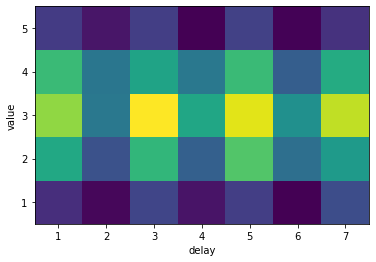

In [7]:
plt.hist2d(df[df.name == "good ion"]["delay"],
           df[df.name == "good ion"]["value"],
           bins=[delay_bins, value_bins])
plt.xlabel("delay")
plt.ylabel("value")
plt.show()

### normalize on events per delay bin 

,delay,value,name,delay_bin,weight
eventID,,,,,
0,5.400453,3.539021,good ion,5.0,0.000596
1,0.906677,1.048150,bad ion,1.0,0.000643
2,7.118253,2.415279,good ion,7.0,0.000655
3,4.146728,3.219579,bad ion,4.0,0.001025
4,0.914275,3.492466,evil ion,1.0,0.000643


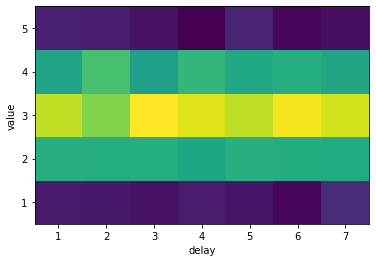

In [8]:
delay_labels = [(a+b)/2 for a,b in zip(delay_bins[:-1],delay_bins[1:])]

df["delay_bin"] = pd.cut(df["delay"], bins=delay_bins, labels=delay_labels)
events_per_delay_bin = df.groupby(df["delay_bin"]).size()   
df["weight"] =  df['delay_bin'].apply(lambda x: 1./events_per_delay_bin[x])


plt.hist2d(df["delay"], df["value"], bins=[delay_bins, value_bins], weights=df["weight"])
plt.xlabel("delay")
plt.ylabel("value")

df.head()